Importar librerías

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import warnings

Lectura de csv

In [18]:
df = pd.read_csv('Datasets/jobs_in_data.csv')

In [19]:
df.head()

,work year,job Title,Job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [20]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [21]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [22]:
import statistics

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [24]:
Salario_promedio = df.groupby('job_category')['salary_in_usd'].mean().reset_index()

In [25]:
print(Salario_promedio)

                     job_category  salary_in_usd
0            BI and Visualization  135092.102236
1              Cloud and Database  155000.000000
2                   Data Analysis  108505.721345
3  Data Architecture and Modeling  156002.359073
4                Data Engineering  146197.656195
5    Data Management and Strategy  103139.934426
6     Data Quality and Operations  100879.472727
7       Data Science and Research  163758.575979
8       Leadership and Management  145476.019881
9         Machine Learning and AI  178925.847339


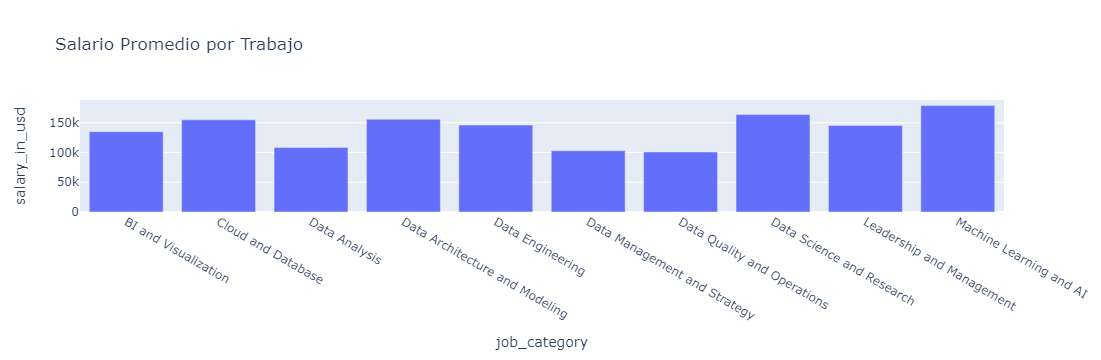

In [26]:
fig = px.bar(Salario_promedio, x='job_category', y='salary_in_usd', title='Salario Promedio por Trabajo')
fig.show()

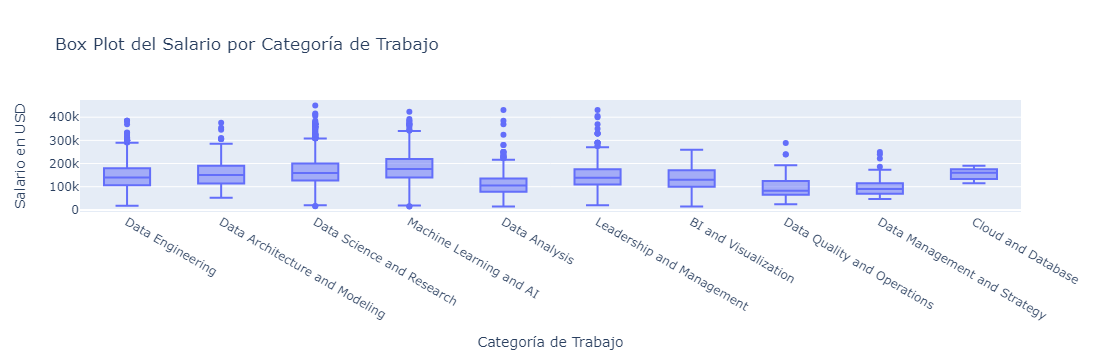

In [27]:
fig = px.box(df, x='job_category', y='salary_in_usd', title='Box Plot del Salario por Categoría de Trabajo',
             labels={'salary_in_usd': 'Salario en USD', 'job_category': 'Categoría de Trabajo'})
fig.show()

In [34]:
salario_promedio_por_pais = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

In [35]:
print(salario_promedio_por_pais)

        company_location  salary_in_usd
0                Algeria  100000.000000
1         American Samoa   50000.000000
2                Andorra   50745.000000
3              Argentina   62000.000000
4                Armenia   50000.000000
..                   ...            ...
65                Turkey   22313.600000
66               Ukraine  121333.333333
67  United Arab Emirates  100000.000000
68        United Kingdom  104447.233853
69         United States  158158.728234

[70 rows x 2 columns]


In [42]:
fig = px.choropleth_mapbox(
    salario_promedio_por_pais,
    locations='company_location',
    color='salary_in_usd',
    color_continuous_scale='blues',
    range_color=(salario_promedio_por_pais['salary_in_usd'].min(), salario_promedio_por_pais['salary_in_usd'].max()),
    mapbox_style='carto-positron',
    zoom=2,
    center={'lat': 0, 'lon': 0},
    title='Salario Promedio por País',
    labels={'salary_in_usd': 'Salario Promedio en USD', 'employee_residence': 'País'}
)